<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Кластеризация**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/code/georgehanyfouad/customer-segmenation-clustering?select=customer_segmentation.csv
Что нужно сделать:

1. Загрузить данные https://www.kaggle.com/code/georgehanyfouad/customer-segmenation-clustering?select=customer_segmentation.csv либо !gdown 1HMjhf3b0LXMfeK4xcwYGmLz20V_zq_2n.
2. Проведисти разведочный анализ данных (EDA)  
3. Построить кластеризацию любым методом, можно отобрать любые признаки
4. Объяснить полученные кластеры





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [2]:
!gdown 1HMjhf3b0LXMfeK4xcwYGmLz20V_zq_2n

Downloading...
From: https://drive.google.com/uc?id=1HMjhf3b0LXMfeK4xcwYGmLz20V_zq_2n
To: /content/customer_segmentation.csv
100% 220k/220k [00:00<00:00, 8.63MB/s]


In [3]:
df = pd.read_csv('/content/customer_segmentation.csv')

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Разведочный анализ данных (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Есть 24 пропуска в графе income. Так как это очень малый процент от всех данных, то можно просто их удалить

In [7]:
df.dropna(subset='Income',inplace=True)

In [29]:
# Анализ выбросов
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    outliers = find_outliers(df[col])
    print(f'{col}: {len(outliers)} выбросов')

ID: 0 выбросов
Year_Birth: 3 выбросов
Income: 8 выбросов
Kidhome: 0 выбросов
Teenhome: 0 выбросов
Recency: 0 выбросов
MntWines: 35 выбросов
MntFruits: 246 выбросов
MntMeatProducts: 174 выбросов
MntFishProducts: 222 выбросов
MntSweetProducts: 246 выбросов
MntGoldProds: 205 выбросов
NumDealsPurchases: 84 выбросов
NumWebPurchases: 3 выбросов
NumCatalogPurchases: 23 выбросов
NumStorePurchases: 0 выбросов
NumWebVisitsMonth: 8 выбросов
AcceptedCmp3: 163 выбросов
AcceptedCmp4: 164 выбросов
AcceptedCmp5: 162 выбросов
AcceptedCmp1: 142 выбросов
AcceptedCmp2: 30 выбросов
Complain: 21 выбросов
Z_CostContact: 0 выбросов
Z_Revenue: 0 выбросов
Response: 333 выбросов
Total_Spending: 3 выбросов
Total_Purchases: 0 выбросов


count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


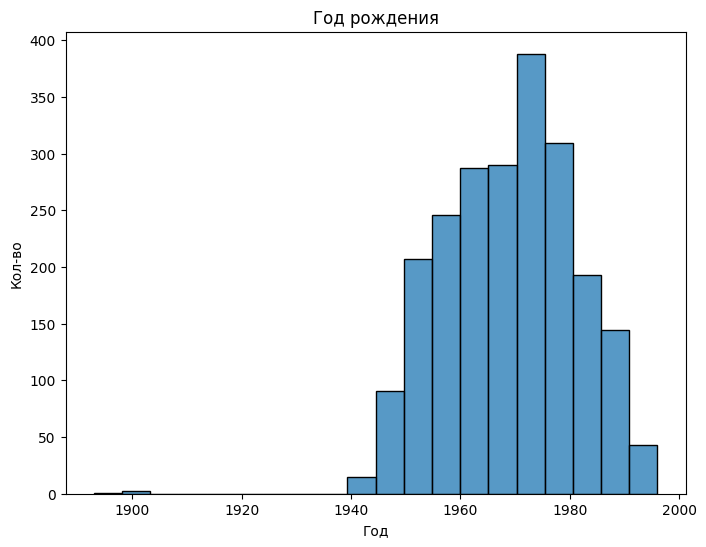

In [22]:
# Анализ по году рождения
count=df['Year_Birth'].describe()
print(count)
plt.figure(figsize=(8, 6))
sns.histplot(x=df['Year_Birth'],bins=20)
plt.xlabel('Год')
plt.title("Год рождения")
plt.ylabel('Кол-во')
plt.show()

Есть выброс, так как человек вряд ли мог родиться в 1900

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


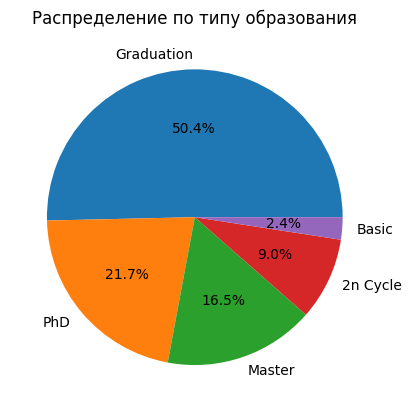

In [24]:
# Анализ образования
counts=df.Education.value_counts()
print(counts)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Распределение по типу образования')
plt.show()

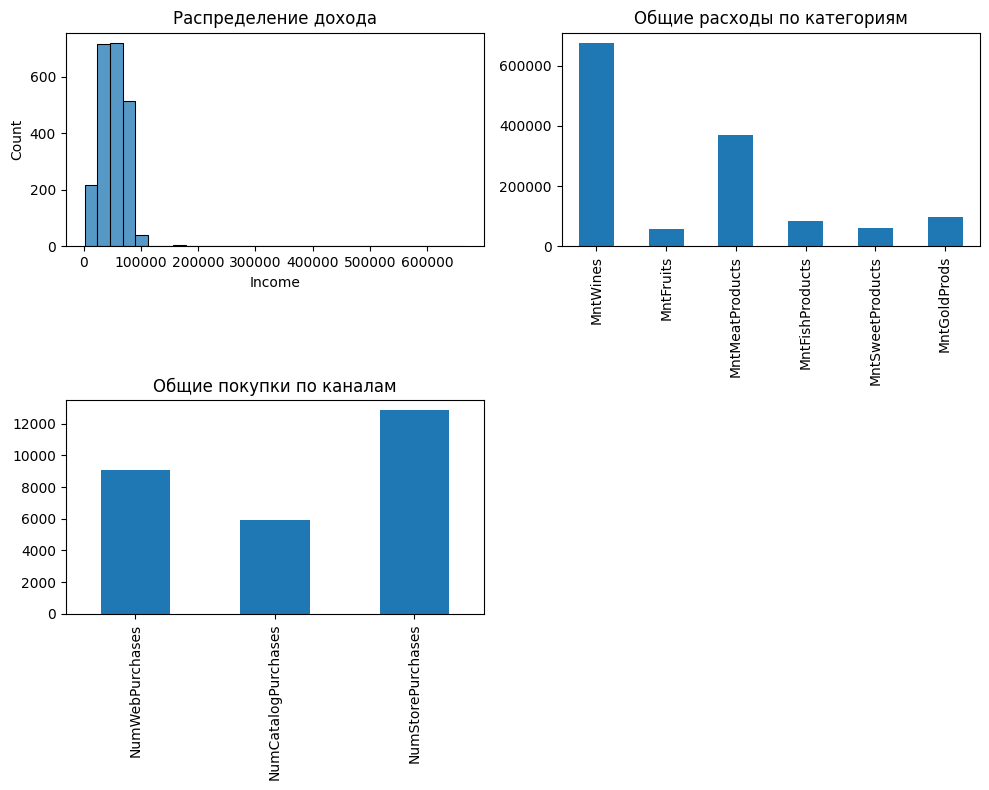

In [27]:
# Все расходы
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Все покупки
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

plt.figure(figsize=(10, 8))

# Распределение дохода
plt.subplot(2, 2, 1)
sns.histplot(df['Income'], bins=30)
plt.title('Распределение дохода')

# Общие расходы по категориям
plt.subplot(2, 2, 2)
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_cols].sum().plot(kind='bar')
plt.title('Общие расходы по категориям')

# Общие покупки по каналам
plt.subplot(2, 2, 3)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[purchase_cols].sum().plot(kind='bar')
plt.title('Общие покупки по каналам')

plt.tight_layout()
plt.show()

In [30]:
# Признаки для кластеризации
features = ['Income', 'Total_Spending', 'Total_Purchases', 'NumDealsPurchases', 'NumWebVisitsMonth']

In [31]:
from sklearn.preprocessing import StandardScaler
# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

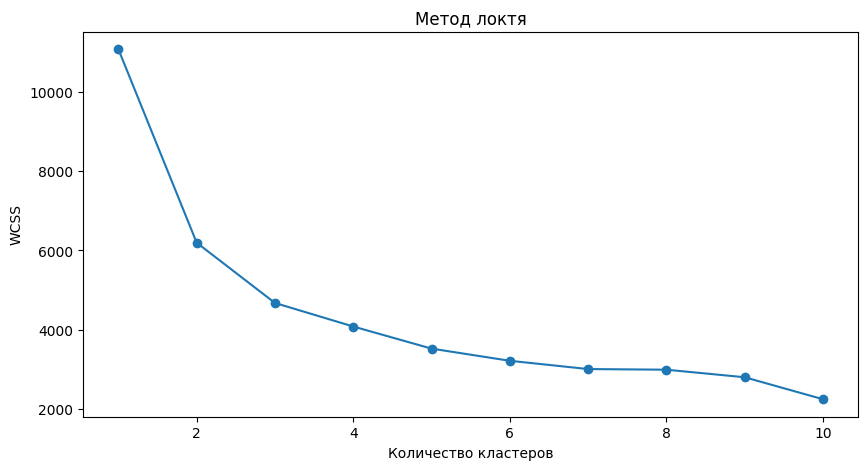

In [33]:
from sklearn.cluster import KMeans
# Определение оптимального числа кластеров (метод локтя)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
# Оценка качества кластеризации
silhouette_avg = silhouette_score(X, clusters)
print(f"Силуэтный коэффициент: {silhouette_avg:.2f}")

Силуэтный коэффициент: 0.44


Значение 0.44 — это умеренно хороший результат. Это говорит о том, что кластеры имеют некоторую структуру и отделимость, но не идеально отчетливо выражены

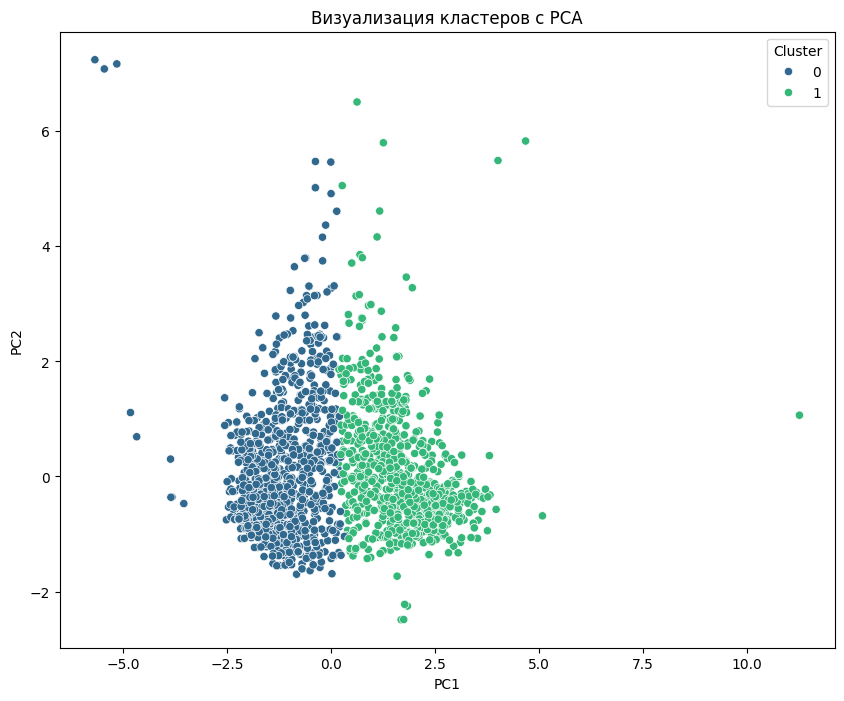

In [43]:
from sklearn.decomposition import PCA
# Визуализация кластеров с помощью PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis')
plt.title('Визуализация кластеров с PCA')
plt.show()



Средние значения по кластерам:
               Income  Total_Spending  Total_Purchases  NumDealsPurchases  \
Cluster                                                                     
0        37415.311373      175.654902         7.508235           2.578824   
1        72343.663124     1191.624867        19.398512           1.977683   

         NumWebVisitsMonth  
Cluster                     
0                 6.550588  
1                 3.650372  


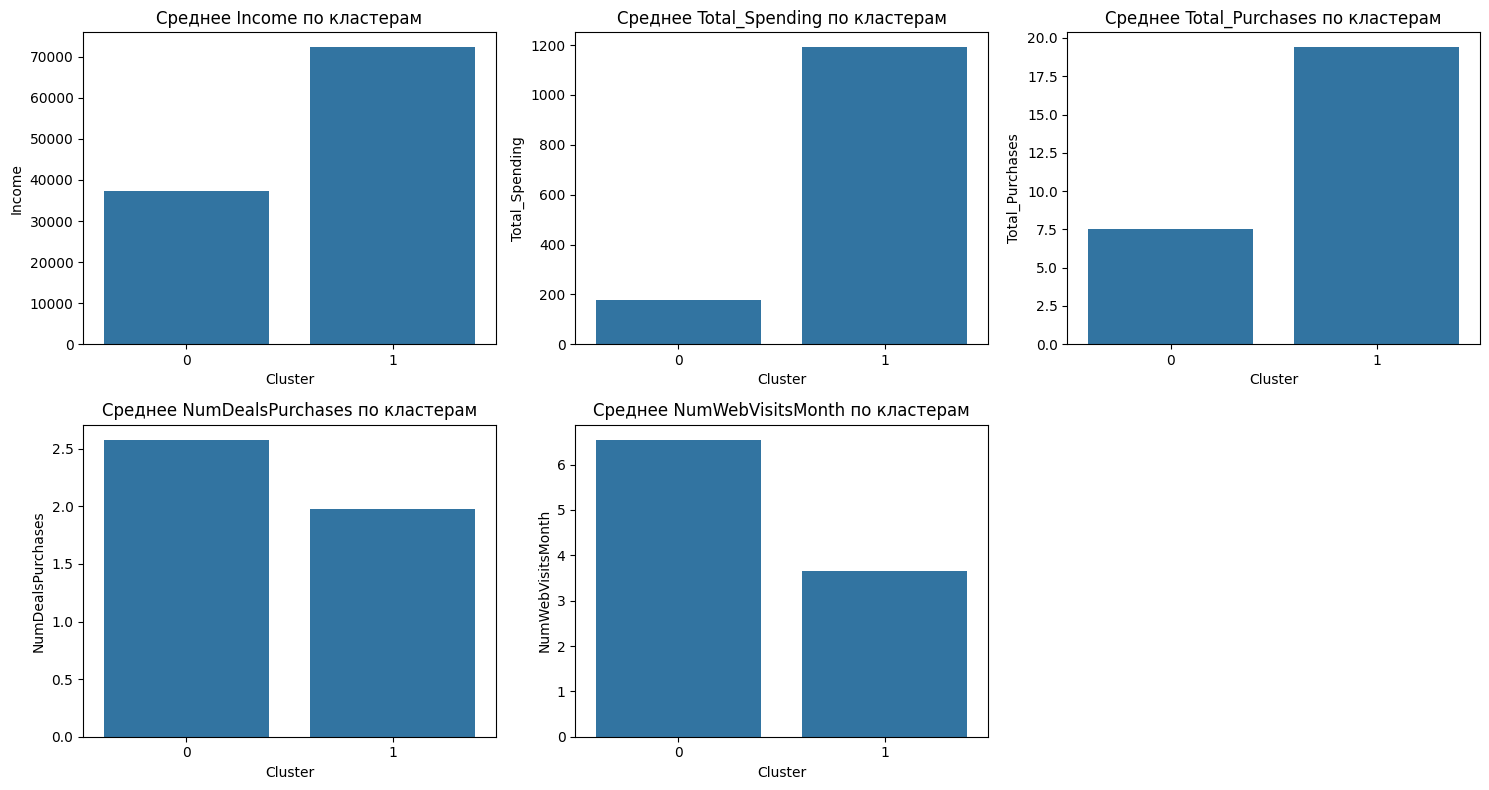

Кластер 0: Клиенты с низким доходом, умеренными расходами и высокой активностью на сайте
Кластер 1: Состоятельные клиенты с высокими расходами, большим количеством покупок и низкой активностью на сайте


In [46]:
# Анализ характеристик кластеров
cluster_means = df.groupby('Cluster')[features].mean()
print("\nСредние значения по кластерам:")
print(cluster_means)

# Визуализация средних значений по кластерам
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=cluster_means.index, y=feature, data=cluster_means)
    plt.title(f'Среднее {feature} по кластерам')
plt.tight_layout()
plt.show()

cluster_profiles = {
    0: "Клиенты с низким доходом, умеренными расходами и высокой активностью на сайте",
    1: "Состоятельные клиенты с высокими расходами, большим количеством покупок и низкой активностью на сайте"
}

for cluster, profile in cluster_profiles.items():
    print(f"Кластер {cluster}: {profile}")